In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import os
import torch
import torchtext
import torchaudio
from torch.utils.data import Dataset, DataLoader, random_split
import matplotlib.pyplot as plt
import transformers
from transformers import BertTokenizer, BertModel
from torchinfo import summary
from ibm_dataset import IBMDebater
import utils
from train_text import train_loop
from models.text_model import TextModel
transformers.logging.set_verbosity_error()

In [2]:
text_transform = torchtext.transforms.ToTensor()
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')            
data_path = 'data/ibm_debater/full'

data = IBMDebater(data_path, 'train', tokenizer, text_transform)
train_len = int(len(data)*0.7)
data_train, data_val = random_split(data, [train_len, len(data) - train_len])

In [3]:
batch_size = 16
loader_train = DataLoader(data_train,
                    batch_size=batch_size,
                    shuffle=True,
                    collate_fn=utils.batch_generator,
                    drop_last=True)
loader_val = DataLoader(data_val,
                    batch_size=batch_size,
                    shuffle=False,
                    collate_fn=utils.batch_generator,
                    drop_last=True)

In [4]:
model = TextModel()
summary(model)

Layer (type:depth-idx)                                  Param #
TextModel                                               --
├─BertModel: 1-1                                        --
│    └─BertEmbeddings: 2-1                              --
│    │    └─Embedding: 3-1                              (23,440,896)
│    │    └─Embedding: 3-2                              (393,216)
│    │    └─Embedding: 3-3                              (1,536)
│    │    └─LayerNorm: 3-4                              (1,536)
│    │    └─Dropout: 3-5                                --
│    └─BertEncoder: 2-2                                 --
│    │    └─ModuleList: 3-6                             (85,054,464)
│    └─BertPooler: 2-3                                  --
│    │    └─Linear: 3-7                                 (590,592)
│    │    └─Tanh: 3-8                                   --
├─Linear: 1-2                                           590,592
├─Linear: 1-3                                           769
├

In [ ]:
train_loop(model, loader_train, loader_val, 10, 'cuda')

In [21]:
from sklearn.manifold import TSNE

X = TSNE(2, learning_rate='auto', init='pca',).fit_transform(features.cpu())

/home/prahtz/GoogleDrive/GitHub/NLP_Project/env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


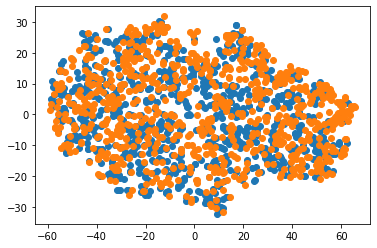

In [28]:
mask = labels == 1.0
plt.scatter(X[mask.cpu(),0], X[mask.cpu(),1])
plt.scatter(X[~mask.cpu(), 0], X[~mask.cpu(), 1])
plt.show()